# Title: Findind the Best Markets to Advertise In
## As an employee of an e-learning company the offers courses on programming on different domains. We want to promote our product and we'd like to invest some money in advertisement.
## Goal is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', dtype={'CodeEventOther':str, 'JobInterestOther':str})
survey_df.shape

(18175, 136)

* The data set is about the survey from freeCodeCamp's 2017 New Coder from more than 20000 developers.
* The data can be downloaded from https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data
***
* Where are these new colders located
* What are the locations with the greatest number of new coders
* How much money new coders are willing to spend on learning.
## Whether it's representative for the population of interest and it has the right categories of people for the purpose.

In [3]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
# Percentage frequency distribution table for the JobRoleInterest
survey_df.JobRoleInterest.value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                11.770595
  Front-End Web Developer                                                                                                                                                6.435927
  Data Scientist                                                                                                                                                         2.173913
Back-End Web Developer                                                                                                                                                   2.030892
  Mobile Developer                                                                                                                                                       1.673341
                                                                                                              

* 1. Most of the people are interested in more than one subject
* 2. Although most people are interested in more than one subject, this sample is still representative 
* 6032 people are interested in web or mobile development.

In [5]:
def number_interest(s):
    if isinstance(s, float) and np.isnan(s):
        return "No answer"
    if len(s.split(',')) == 1:
        return "Interest one subject"
    return "Interest more than one subject"
survey_df['SubjectsNumberInterest'] = survey_df.JobRoleInterest.apply(number_interest)
survey_df['SubjectsNumberInterest'].value_counts()

No answer                         11183
Interest more than one subject     4779
Interest one subject               2213
Name: SubjectsNumberInterest, dtype: int64

In [6]:
def web_mobile_interest(s):
    if isinstance(s, float) and np.isnan(s):
        return "No answer"
    if 'mobile developer' in s.lower() or 'web developer' in s.lower():
        return 'Yes'
    return 'No'
survey_df['WhetherInterestWebMobileDeveloper'] = survey_df.JobRoleInterest.apply(web_mobile_interest)
survey_df['WhetherInterestWebMobileDeveloper'].value_counts()

No answer    11183
Yes           6032
No             960
Name: WhetherInterestWebMobileDeveloper, dtype: int64

In [7]:
survey_df.pivot_table(index = 'SubjectsNumberInterest', values = ['WhetherInterestWebMobileDeveloper'],
                     aggfunc = 'count')

,WhetherInterestWebMobileDeveloper
SubjectsNumberInterest,
Interest more than one subject,4779
Interest one subject,2213
No answer,11183


In [8]:
interest = survey_df[['SubjectsNumberInterest','WhetherInterestWebMobileDeveloper']].copy()
interest

,SubjectsNumberInterest,WhetherInterestWebMobileDeveloper
0,No answer,No answer
1,Interest one subject,Yes
2,Interest more than one subject,Yes
3,Interest more than one subject,Yes
4,Interest more than one subject,Yes
...,...,...
18170,No answer,No answer
18171,Interest more than one subject,Yes
18172,No answer,No answer
18173,No answer,No answer


In [9]:
interest_table = pd.DataFrame(interest.groupby(['SubjectsNumberInterest', 
                                                'WhetherInterestWebMobileDeveloper']).size())
interest_table

0
SubjectsNumberInterest         WhetherInterestWebMobileDeveloper       
Interest more than one subject No                                   280
                               Yes                                 4499
Interest one subject           No                                   680
                               Yes                                 1533
No answer                      No answer                          11183

In [10]:
interest_table.reset_index()

,SubjectsNumberInterest,WhetherInterestWebMobileDeveloper,0
0,Interest more than one subject,No,280
1,Interest more than one subject,Yes,4499
2,Interest one subject,No,680
3,Interest one subject,Yes,1533
4,No answer,No answer,11183


In [11]:
interest_table.columns = ['Number']
interest_table

Number
SubjectsNumberInterest         WhetherInterestWebMobileDeveloper        
Interest more than one subject No                                    280
                               Yes                                  4499
Interest one subject           No                                    680
                               Yes                                  1533
No answer                      No answer                           11183

Text(0, 0.5, '')

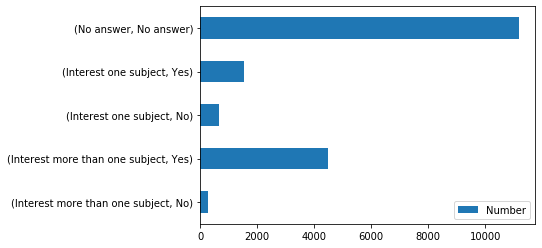

In [13]:
interest_table.plot.barh()
plt.ylabel('')

## Where these new coders are located, and what are the densities for each locations.

In [14]:
survey_df.CountryCitizen.value_counts(dropna=False)

United States of America    5480
NaN                         2793
India                       1594
United Kingdom               640
Canada                       564
                            ... 
Bermuda                        1
Madagascar                     1
Falkland Islands               1
Curacao                        1
Congo                          1
Name: CountryCitizen, Length: 182, dtype: int64

In [15]:
survey_df.CountryLive.value_counts(dropna=False)
# Country where people actually live at the moment.

United States of America    5791
NaN                         2839
India                       1400
United Kingdom               757
Canada                       616
                            ... 
Madagascar                     1
Korea North                    1
Hawaii                         1
Canary Islands                 1
Kuwait                         1
Name: CountryLive, Length: 173, dtype: int64

## Finding the two best countries to advertise in
## Number of potential customers - the more potential customers in a market, the better.
***
## To make sure working with a representative  sample, drop all the rows where participants didn't answer what role they are interested in.

In [19]:
clean_df = survey_df[~survey_df.JobRoleInterest.isna()].copy()
clean_df.JobRoleInterest.value_counts(dropna=False)

Full-Stack Web Developer                                                                                                                                        823
  Front-End Web Developer                                                                                                                                       450
  Data Scientist                                                                                                                                                152
Back-End Web Developer                                                                                                                                          142
  Mobile Developer                                                                                                                                              117
                                                                                                                                                               ... 
Back-End Web Dev

In [23]:
country_frequency = clean_df.CountryLive.value_counts()
country_percentage = clean_df.CountryLive.value_counts(normalize=True)

In [24]:
country_frequency

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Cayman Islands                 1
Jordan                         1
Sudan                          1
Samoa                          1
Nicaragua                      1
Name: CountryLive, Length: 137, dtype: int64

In [27]:
country_percentage

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
                              ...   
Cayman Islands              0.000146
Jordan                      0.000146
Sudan                       0.000146
Samoa                       0.000146
Nicaragua                   0.000146
Name: CountryLive, Length: 137, dtype: float64

## Based on the frequency table for countries that people live, I will choose US and India for advertisement.
***
## How much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable.

### Narrow down the analysis to only four countries: the US, India, United Kingdom and Canada.
   * These are the countries having the highest absolute frequency in the sample, which means we have a decent amount of data for each.
   * Our course are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with ads.
***


In [35]:
clean_four_countries = clean_df[clean_df.CountryLive.isin(['United States of America',
                                                          'India','United Kingdom', 'Canada'])].copy()
# People with job role interestedn and belong to one of the four countries

In [36]:
clean_four_countries.CountryLive.value_counts(dropna=False)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

In [37]:
clean_four_countries.MonthsProgramming.value_counts().sort_index()

0.0      150
1.0      480
2.0      401
3.0      380
4.0      209
        ... 
300.0      1
360.0      3
408.0      1
480.0      2
744.0      3
Name: MonthsProgramming, Length: 80, dtype: int64

In [40]:
clean_four_countries.MonthsProgramming[clean_four_countries.MonthsProgramming == 0] = 1
clean_four_countries.MonthsProgramming.value_counts().sort_index()

/home/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1.0      630
2.0      401
3.0      380
4.0      209
5.0      156
        ... 
300.0      1
360.0      3
408.0      1
480.0      2
744.0      3
Name: MonthsProgramming, Length: 79, dtype: int64

In [43]:
clean_four_countries['MoneyPerMonth'] = clean_four_countries.MoneyForLearning / clean_four_countries.MonthsProgramming

In [45]:
clean_four_countries['MoneyPerMonth'].value_counts(dropna=False).sort_index()

0.000000        1844
0.033333           1
0.050000           1
0.066667           1
0.138889           1
                ... 
15000.000000       2
16666.666667       1
50000.000000       1
80000.000000       1
NaN              313
Name: MoneyPerMonth, Length: 388, dtype: int64

* 313 null values in the new column (the column describing the amount of money students spend per month)

In [46]:
clean_four_countries = clean_four_countries[~clean_four_countries['MoneyPerMonth'].isna()].copy()
clean_four_countries['MoneyPerMonth'].value_counts(dropna=False).sort_index()

0.000000        1844
0.033333           1
0.050000           1
0.066667           1
0.138889           1
                ... 
14000.000000       1
15000.000000       2
16666.666667       1
50000.000000       1
80000.000000       1
Name: MoneyPerMonth, Length: 387, dtype: int64

In [52]:
clean_four_countries.pivot_table(index = 'CountryLive', values = ['MoneyPerMonth'], 
                                aggfunc=[np.mean,np.median, 'count'])

,mean,median,count
,MoneyPerMonth,MoneyPerMonth,MoneyPerMonth
CountryLive,,,
Canada,113.510961,0.000000,240
India,135.100982,0.000000,463
United Kingdom,45.534443,0.000000,279
United States of America,227.997996,3.333333,2933


In [51]:
clean_four_countries.groupby('CountryLive').size()

CountryLive
Canada                       240
India                        463
United Kingdom               279
United States of America    2933
dtype: int64

In [54]:
clean_four_countries.groupby('CountryLive')['MoneyPerMonth'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: MoneyPerMonth, dtype: float64

## The US and India are still the two countries most worthable for invest since people spend more money on program learning in these two countries.
* The results for the United Kingdom and Canada are suprisingly low relative to the values for India. If considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.
* It might be that we don't have enough representative data for the UK, Canada and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. **Or** it might be that the results are correct.

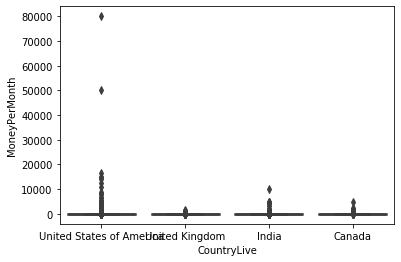

In [60]:
sns.boxplot(x = 'CountryLive',y = 'MoneyPerMonth',data = clean_four_countries, linewidth=2.5)

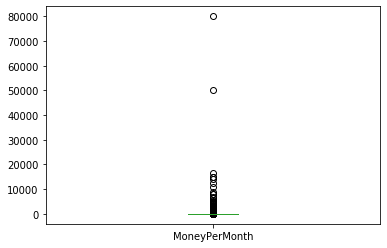

In [63]:
clean_four_countries[clean_four_countries.CountryLive == 'United States of America'].MoneyPerMonth.plot.box()

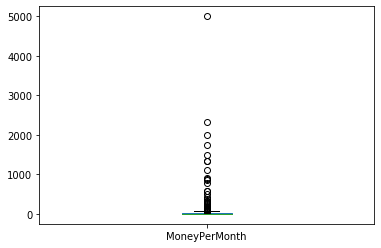

In [65]:
clean_four_countries[clean_four_countries.CountryLive == 'Canada'].MoneyPerMonth.plot.box()

In [66]:
clean_four_countries[clean_four_countries.CountryLive == 'Canada'].MoneyPerMonth.describe()

count     240.000000
mean      113.510961
std       441.014158
min         0.000000
25%         0.000000
50%         0.000000
75%        25.000000
max      5000.000000
Name: MoneyPerMonth, dtype: float64

In [109]:
clean_four_countries[clean_four_countries.CountryLive == 'India'].MoneyPerMonth.describe()

count      463.000000
mean       135.100982
std        692.960378
min          0.000000
25%          0.000000
50%          0.000000
75%         13.250000
max      10000.000000
Name: MoneyPerMonth, dtype: float64

In [110]:
clean_four_countries[clean_four_countries.CountryLive == 'India'].MoneyPerMonth.value_counts().sort_index()

0.000000        262
0.138889          1
0.416667          3
0.431034          1
0.555556          1
               ... 
2000.000000       2
3333.333333       1
4166.666667       1
5000.000000       3
10000.000000      1
Name: MoneyPerMonth, Length: 102, dtype: int64

In [111]:
cutoff_india = 3000
india = clean_four_countries[(clean_four_countries.CountryLive=='India') & (
clean_four_countries.MoneyPerMonth < cutoff_india)].MoneyPerMonth

In [112]:
india.describe()

count     457.000000
mean       65.758763
std       233.452738
min         0.000000
25%         0.000000
50%         0.000000
75%        12.500000
max      2000.000000
Name: MoneyPerMonth, dtype: float64

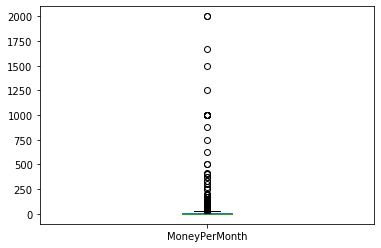

In [113]:
india.plot.box()

In [68]:
clean_four_countries[clean_four_countries.CountryLive == 'United Kingdom'].MoneyPerMonth.describe()

count     279.000000
mean       45.534443
std       162.311836
min         0.000000
25%         0.000000
50%         0.000000
75%        20.416667
max      1400.000000
Name: MoneyPerMonth, dtype: float64

In [114]:
clean_four_countries[clean_four_countries.CountryLive == 'United Kingdom'].MoneyPerMonth.value_counts().sort_index()

0.000000       142
0.050000         1
0.250000         1
0.333333         1
0.416667         1
              ... 
936.750000       1
1000.000000      1
1200.000000      1
1250.000000      1
1400.000000      1
Name: MoneyPerMonth, Length: 71, dtype: int64

In [116]:
uk = clean_four_countries[(clean_four_countries.CountryLive == 'United Kingdom') & (
clean_four_countries.MoneyPerMonth <= 1400)].MoneyPerMonth

In [117]:
uk.describe()

count     279.000000
mean       45.534443
std       162.311836
min         0.000000
25%         0.000000
50%         0.000000
75%        20.416667
max      1400.000000
Name: MoneyPerMonth, dtype: float64

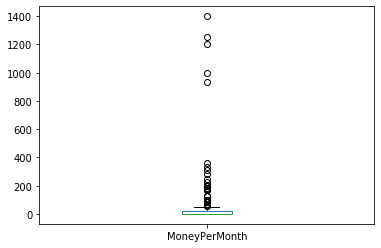

In [118]:
uk.plot.box()

In [84]:
clean_four_countries[clean_four_countries.CountryLive == 'Canada'].MoneyPerMonth.describe()

count     240.000000
mean      113.510961
std       441.014158
min         0.000000
25%         0.000000
50%         0.000000
75%        25.000000
max      5000.000000
Name: MoneyPerMonth, dtype: float64

In [119]:
clean_four_countries[clean_four_countries.CountryLive == 'Canada'].MoneyPerMonth.value_counts().sort_index()

0.000000       126
0.416667         1
0.833333         1
1.052632         1
1.388889         1
              ... 
1500.000000      1
1750.000000      1
2000.000000      1
2337.166667      1
5000.000000      1
Name: MoneyPerMonth, Length: 71, dtype: int64

In [121]:
canada = clean_four_countries[(clean_four_countries.CountryLive == 'Canada') & (
clean_four_countries.MoneyPerMonth < 5000)].MoneyPerMonth
canada.describe()

count     239.000000
mean       93.065400
std       307.512802
min         0.000000
25%         0.000000
50%         0.000000
75%        25.000000
max      2337.166667
Name: MoneyPerMonth, dtype: float64

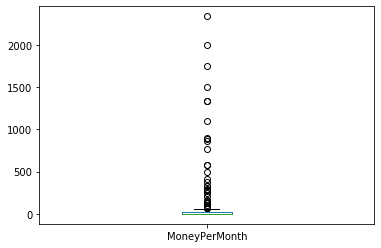

In [122]:
canada.plot.box()

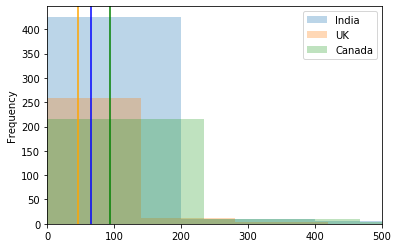

In [124]:
india.plot.hist(alpha = 0.3, label = 'India')
plt.axvline(india.mean(), color = 'Blue')
uk.plot.hist(alpha = 0.3, label = 'UK')
plt.axvline(uk.mean(), color = 'Orange')
canada.plot.hist(alpha = 0.3, label = 'Canada')
plt.axvline(canada.mean(), color = 'Green')
plt.xlim(0, 500)
plt.legend()

## After eliminate extreme ourliers, mean of UK and Canada are higher than India as expected.

In [127]:
print(india.describe())
print('*' * 12)
print(uk.describe())
print('*' * 12)
print(canada.describe())

count     457.000000
mean       65.758763
std       233.452738
min         0.000000
25%         0.000000
50%         0.000000
75%        12.500000
max      2000.000000
Name: MoneyPerMonth, dtype: float64
************
count     279.000000
mean       45.534443
std       162.311836
min         0.000000
25%         0.000000
50%         0.000000
75%        20.416667
max      1400.000000
Name: MoneyPerMonth, dtype: float64
************
count     239.000000
mean       93.065400
std       307.512802
min         0.000000
25%         0.000000
50%         0.000000
75%        25.000000
max      2337.166667
Name: MoneyPerMonth, dtype: float64



***
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.

You might have reached different conclusions, which is totally fine, as long as you constructed a sound reasoning for those conclusions. Try to wrap up your work by writing a conclusion section that has no more than two paragraphs.

You can also continue working on this project. Next steps include:

    Finding other criteria for choosing the best market.
    Analyzing other data sets:
        freeCodeCamp's 2016 New Coders Survey.
        Stack Overflow 2018 Developer Survey.
    Improving your project from a stylistical point of view by following the guidelines discussed in this style guide.
